In [1]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using Plots; gr();

  Activating project at `~/Coding/julia/FUSE`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1423


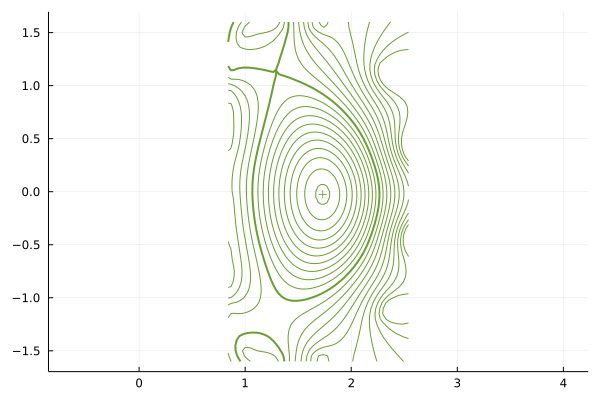

equilibrium.ids_properties was skipped in IMAS.jl data dictionary
(dd.equilibrium.time_slice[]).global_quantities.beta_tor = 0.010634147869546463
(dd.equilibrium.time_slice[]).global_quantities.beta_normal = 1.0274290315379087
(dd.equilibrium.time_slice[]).global_quantities.ip = 1.08374265e6
(dd.equilibrium.time_slice[]).global_quantities.li_3 = 0.7284145029769709


0.7284145029769709

In [2]:
if false
    ϵ = 0.32
    κ = 1.85
    δ = 0.485
    R0 = 6.2
    Z0 = 0.4
    B0 = 5.3
    ip = 15.E6
    βn = 2.0
    x_point = false#(5.0, -3.8)
    symmetric=true
    resolution = 129

    dd = IMAS.dd()
    eqt=resize!(dd.equilibrium.time_slice,-1.0)

    dd.global_time = 0.0
    FUSE.init(dd.equilibrium; B0, R0, Z0, ϵ, δ, κ, beta_n=βn, ip, x_point=x_point)
    
    eqactor = FUSE.SolovevEquilibriumActor(dd, symmetric=symmetric)
    @time FUSE.step(eqactor,verbose=false)
    FUSE.finalize(eqactor, resolution, (maximum([R0*(1-ϵ*2), 0.0]), R0*(1+ϵ*2)), (-R0*ϵ*κ*2, R0*ϵ*κ*2))

elseif false
    filename = joinpath(dirname(abspath(@__FILE__)), "..", "sample","CAT_eq_ods.json")
    dd = IMAS.json2imas(filename);
    @time IMAS.flux_surfaces(dd.equilibrium);

elseif false
    filename = joinpath(dirname(abspath(@__FILE__)), "..", "sample","ITER_eq_ods.json")
    dd = IMAS.json2imas(filename);
    dd.equilibrium.time=[0.0]
    @time IMAS.flux_surfaces(dd.equilibrium);
else
    filename = joinpath(dirname(abspath(@__FILE__)), "..", "sample","D3D_eq_ods.json")
    dd = IMAS.json2imas(filename);
    dd.equilibrium.time=[0.0]
#    @time IMAS.flux_surfaces(dd.equilibrium);
end

display(plot(dd.equilibrium))
if true
    @show dd.equilibrium.time_slice[].global_quantities.beta_tor
    @show dd.equilibrium.time_slice[].global_quantities.beta_normal
    @show dd.equilibrium.time_slice[].global_quantities.ip;
    @show dd.equilibrium.time_slice[].global_quantities.li_3;
end

"4.088 KeV ==> cost 1.39e+05"

"6.549 KeV ==> cost 6.00e+06"

"2.567 KeV ==> cost 2.81e+01"

"1.627 KeV ==> cost 2.37e+01"

"1.045 KeV ==> cost 2.51e+01"

"1.986 KeV ==> cost 2.26e+01"

"2.208 KeV ==> cost 2.18e+01"

"2.345 KeV ==> cost 1.23e+01"

"2.430 KeV ==> cost 8.90e-01"

"2.482 KeV ==> cost 8.28e+00"

"2.397 KeV ==> cost 5.67e+00"

"2.450 KeV ==> cost 2.39e+00"

"2.430 KeV ==> cost 8.90e-01"

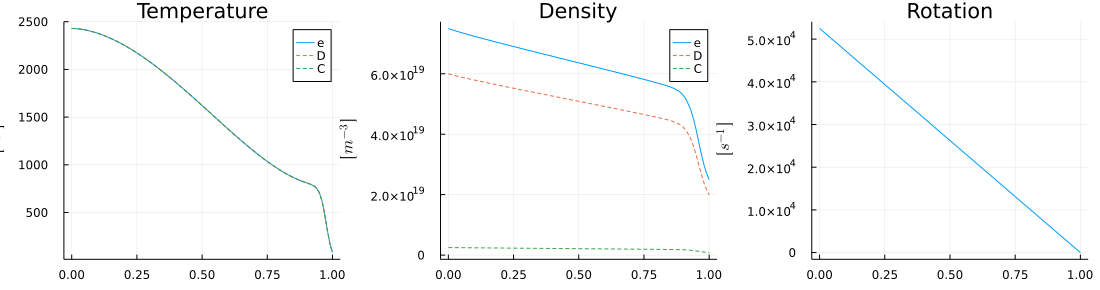

Results of Optimization Algorithm
 * Algorithm: Golden Section Search
 * Search Interval: [105.318698, 10531.869825]
 * Minimizer: 2.429526e+03
 * Minimum: 8.904576e-01
 * Iterations: 11
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+2.2e-16): true
 * Objective Function Calls: 12
method = Optim.GoldenSection()
initial_lower = 105.31869825361832
initial_upper = 10531.869825361831
minimizer = 2429.5258166930535
minimum = 0.8904576021497697
iterations = 11
iteration_converged = false
converged = true
rel_tol = 0.01
abs_tol = 2.220446049250313e-16
f_calls = 12
  0.068807 seconds (193.09 k allocations: 16.455 MiB)


In [18]:
FUSE.init_core_profiles(dd; ne_ped=5E19, ne_peaking=1.5, Te_ped=500, Te_peaking=3, w_ped=0.08, zeff=2, Paux=10e6, n_points=101, bulk=:D, impurity=:C)
FUSE.init_core_sources(dd; Paux_e=5e6, Paux_i=5e6);

p3=plot(layout=(1,3))
tauennactor = FUSE.TaueNNactor(dd,use_tglfnn=true, error=1E-2)
@time FUSE.step(tauennactor;verbose=true)
FUSE.finalize(tauennactor)
display(plot(p3,dd.core_profiles))

In [8]:
IMAS.calc_beta_thermal_norm!(dd.summary, dd.equilibrium, dd.core_profiles)

1.8807809999247336